In [2]:
using FastGaussQuadrature

In [3]:
using Plots, RecipesBase
pyplot()

""" Function to plot 2d points that are in the form of nested arrays"""
@recipe function plt2dpts(pts::Array{Array{Float64,1},1})
    p = hcat(pts...)
    dims = size(p)
    legend = false
    @series begin
        p[1,:],p[2,:]
    end
end

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


RecipesBase.apply_recipe

In [4]:
# cranioid
p = 0.9
q = 0.8
a = 1.0
b = 2.2
c = 2.2
t = LinRange(0,2*pi,100)

cran(thet) = a*sin(thet)+b*sqrt(1-p*cos(thet)^2)+c*sqrt(1-q*cos(thet)^2)
r = cran.(t)

tocartesian(r,thet) = [r*cos(thet),r*sin(thet)]
bdy = tocartesian.(r,t)


100-element Array{Array{Float64,1},1}:
 [1.6795709953369509, 0.0]
 [1.7598099208206663, 0.11183921154492438]
 [1.8705187563290007, 0.2387140580967147]
 [2.0043608115891702, 0.3863088825063702]
 [2.1519688318016836, 0.5583587640582022]
 [2.3036635056626147, 0.7565960568414642]
 [2.4504674745772803, 0.9810191915594586]
 [2.5845244221653725, 1.2302390058495218]
 [2.6991929406219657, 1.501790620068181]
 [2.789006607313199, 1.7923857115848323]
 [2.8495957264893614, 2.098112882022836]
 [2.877608700126588, 2.4146003989487523]
 [2.8706440439961414, 2.7371535673305947]
 ⋮
 [1.8928009471143805, -1.5882485766156842]
 [1.8946934850452877, -1.3950332573511126]
 [1.8793746119586814, -1.2078007245867213]
 [1.8494675106724519, -1.0290160876786838]
 [1.808377957873616, -0.8607916729340456]
 [1.760388463095169, -0.7047532296645285]
 [1.7107555766079738, -0.5618663143725228]
 [1.6657720957012145, -0.43220814112798733]
 [1.632698355928843, -0.31467681552244364]
 [1.6193707691479218, -0.2066627594930721]
 

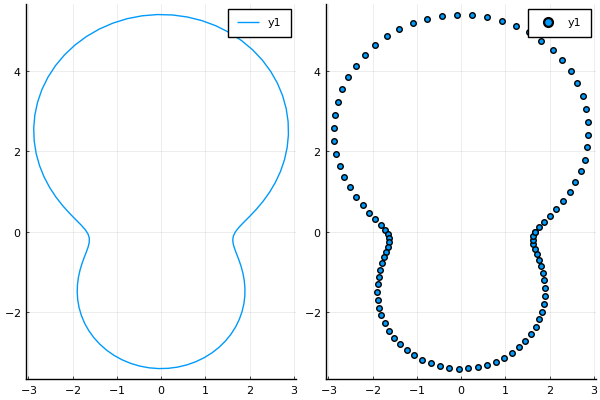

In [5]:
p1 = plot(bdy)
p2 = scatter(bdy)

plot(p1,p2,layout=(1,2))

In [6]:
# GL grid parameters
N,M = (32,32)
nox, wtx = FastGaussQuadrature.gausslegendre(N)
noy, wty = FastGaussQuadrature.gausslegendre(M)

([-0.9972638618494816, -0.9856115115452684, -0.9647622555875064, -0.9349060759377397, -0.8963211557660521, -0.84936761373257, -0.7944837959679424, -0.7321821187402897, -0.6630442669302152, -0.5877157572407623  …  0.5877157572407623, 0.6630442669302152, 0.7321821187402897, 0.7944837959679424, 0.84936761373257, 0.8963211557660521, 0.9349060759377397, 0.9647622555875064, 0.9856115115452684, 0.9972638618494816], [0.007018610009470092, 0.016274394730905625, 0.025392065309262066, 0.034273862913021355, 0.042835898022226614, 0.05099805926237619, 0.05868409347853553, 0.06582222277636186, 0.07234579410884855, 0.07819389578707035  …  0.07819389578707035, 0.07234579410884855, 0.06582222277636186, 0.05868409347853553, 0.05099805926237619, 0.042835898022226614, 0.034273862913021355, 0.025392065309262066, 0.016274394730905625, 0.007018610009470092])

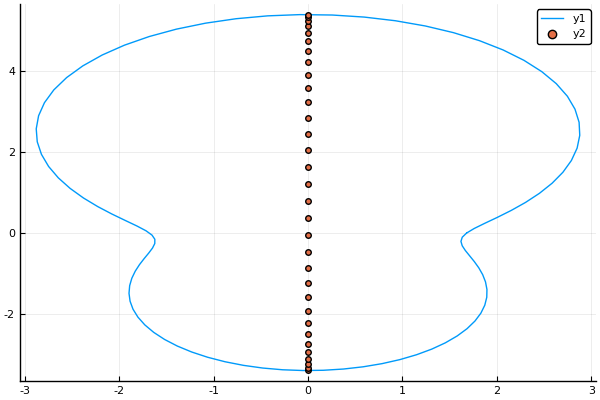

In [62]:
# Scale the y values to the maximum interval

function findminmax(pts::Array{Array{Float64,1},1}, dim::Int64)
    out = map(y->y[dim],pts)
    [minimum(out),maximum(out)]
end

function sclint(y::Vector{Float64}, mm::Vector{Float64})
    loc = (mm[1] + mm[2])/2
    scl = (mm[2] - mm[1])/2
    y*scl .+ loc
end

noys = sclint(noy,findminmax(bdy,2))

p1 = plot(bdy)
p1 = scatter!(zeros(length(noys)),noys)

In [69]:
# For each y-value find the corresponding x value

function sgn(x)
    if x > 0
        return 1
    elseif x < 0
        return -1
    else
        return 0
    end
end

function xcross(p1,y)
    if p1[1,1] == p1[1,2]
        x = p1[1,1]
    else
        m = (p1[2,1] - p1[2,2])/(p1[1,1] - p1[1,2])
        b = (p1[2,1] - m*p1[1,1])
        x = (y-b)/m
    end
    return x
end

function findxcross(pts::Array{Array{Float64,1},1}, y::Float64)
    out = diff(map(x->sgn(x[2]-y), pts))
    up  = findall(out .== 2)
    dow = findall(out .== -2)
    xcross(hcat(pts[up[1]], pts[up[1]+1]),y)    
end

x = findxcross(bdy, noys[13])



([95], [54])